1. 准备数据集
2. 设计模型
3. 构造损失函数和优化器
4. 训练周期：forward backward update

Pytorch里的优化器：
* torch.optim.Adagrad
* torch.optim.Adam
* torch.optim.Adamax
* torch.optim.ASGD
* torch.optim.LBFGS
* torch.optim.RMSprop
* torch.optim.Rprop
* torch.optim.SGD

分类问题：逻辑斯蒂回归

In [2]:
import torchvision
# torchvision 是PyTorch中专门用来处理图像的库。这个包中有四个大类。
# torchvision.datasets 是用来进行数据加载的，PyTorch团队在这个包中帮我们提前处理好了很多很多图片数据集。
# torchvision.models 为我们提供了已经训练好的模型，让我们可以加载之后，直接使用
# torchvision.transforms 提供大多数图像变换操作
# torchvision.utils

train_set = torchvision.datasets.MNIST(root = "./dataset/mnist", train=True, download=True)
test_set = torchvision.datasets.MNIST(root = "./dataset/mnist", train=False, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./dataset/mnist\MNIST\raw\train-images-idx3-ubyte.gz to ./dataset/mnist\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./dataset/mnist\MNIST\raw\train-labels-idx1-ubyte.gz to ./dataset/mnist\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./dataset/mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to ./dataset/mnist\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./dataset/mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./dataset/mnist\MNIST\raw



Sigmoid函数：(-1,1), 单调递增，饱和函数
* tanh(x)
* $\sigma(x)=\frac{1}{1+e^{-x}}$ 输出范围（0，1） 逻辑斯蒂函数

交叉熵(BCE Loss)：衡量两个分布之间的差异

$\sum_{x_i}P_{D_1}(x_i)\ln P_{D_2}(x_i)$，值越大，分布越接近

交叉熵损失，越小越好，在前面加负号：$-\sum_{x_i}P_{D_1}(x_i)\ln P_{D_2}(x_i)$

D:\Users\27586\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
D:\Users\27586\anaconda3\lib\site-packages\torch\nn\functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0 2.198194980621338
1 2.1876726150512695
2 2.177934169769287
3 2.1689085960388184
4 2.1605308055877686
5 2.1527397632598877
6 2.1454787254333496
7 2.1386964321136475
8 2.1323444843292236
9 2.126380205154419
10 2.1207633018493652
11 2.115457534790039
12 2.110430955886841
13 2.1056532859802246
14 2.1010985374450684
15 2.0967421531677246
16 2.0925633907318115
17 2.0885424613952637
18 2.084662675857544
19 2.0809082984924316
20 2.077265977859497
21 2.0737226009368896
22 2.070268392562866
23 2.0668938159942627
24 2.063589334487915
25 2.0603485107421875
26 2.057163715362549
27 2.054029941558838
28 2.0509414672851562
29 2.04789400100708
30 2.0448830127716064
31 2.041905164718628
32 2.0389578342437744
33 2.0360372066497803
34 2.033141613006592
35 2.030268907546997
36 2.027416706085205
37 2.024583578109741
38 2.021768093109131
39 2.0189692974090576
40 2.0161855220794678
41 2.013416290283203
42 2.010660171508789
43 2.0079166889190674
44 2.005185127258301
45 2.002465009689331
46 1.9997555017471313

386 1.3873236179351807
387 1.3861368894577026
388 1.3849527835845947
389 1.3837711811065674
390 1.3825920820236206
391 1.3814153671264648
392 1.380240797996521
393 1.3790690898895264
394 1.3778992891311646
395 1.3767318725585938
396 1.3755671977996826
397 1.374405026435852
398 1.3732446432113647
399 1.372087001800537
400 1.370931625366211
401 1.3697786331176758
402 1.3686281442642212
403 1.367479681968689
404 1.3663338422775269
405 1.3651899099349976
406 1.3640484809875488
407 1.3629096746444702
408 1.3617727756500244
409 1.3606387376785278
410 1.3595064878463745
411 1.3583766222000122
412 1.3572489023208618
413 1.356123447418213
414 1.3550004959106445
415 1.3538798093795776
416 1.3527610301971436
417 1.3516448736190796
418 1.350530743598938
419 1.3494189977645874
420 1.3483091592788696
421 1.3472018241882324
422 1.3460966348648071
423 1.3449938297271729
424 1.3438929319381714
425 1.3427942991256714
426 1.3416976928710938
427 1.3406034708023071
428 1.3395113945007324
429 1.338421583175

766 1.0635571479797363
767 1.062946081161499
768 1.0623360872268677
769 1.0617270469665527
770 1.0611186027526855
771 1.0605113506317139
772 1.05990469455719
773 1.059299111366272
774 1.0586941242218018
775 1.058090329170227
776 1.0574876070022583
777 1.0568854808807373
778 1.0562843084335327
779 1.055683970451355
780 1.055084466934204
781 1.0544859170913696
782 1.053888201713562
783 1.0532915592193604
784 1.0526955127716064
785 1.0521003007888794
786 1.0515060424804688
787 1.050912857055664
788 1.0503201484680176
789 1.0497286319732666
790 1.049137830734253
791 1.0485478639602661
792 1.0479588508605957
793 1.0473705530166626
794 1.046783208847046
795 1.046196460723877
796 1.0456109046936035
797 1.0450259447097778
798 1.044442057609558
799 1.0438588857650757
800 1.0432764291763306
801 1.0426950454711914
802 1.0421142578125
803 1.0415345430374146
804 1.0409554243087769
805 1.0403773784637451
806 1.0397999286651611
807 1.039223551750183
808 1.0386477708816528
809 1.0380727052688599
810 1

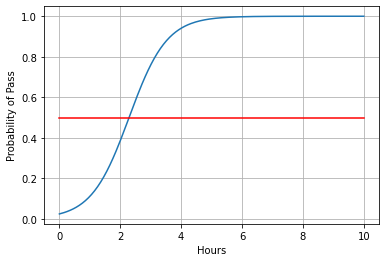

In [11]:
import torch
import torch.nn.functional as F 
import numpy as np
import matplotlib.pyplot as plt

# 1. 数据准备
x_data = torch.Tensor([[1],[2],[3],[4]])  # 初始化为一个3*1的矩阵
y_data = torch.Tensor([[0],[0],[1],[1]])

# 2. 设计模型
# 将模型定义成一个类，继承自torch.nn.Module，需要实现init和forward两个函数
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel,self).__init__() #调用父类的构造，必须要有
        self.linear = torch.nn.Linear(1,1) #Linear对象中包含了weight和bias这两个Tensor,自动实现wx+b
        
        
    def forward(self,x):
        y_pred = F.sigmoid(self.linear(x)) 
        return y_pred

model = LogisticRegressionModel()

# 3. 构造损失函数和优化器
# 这里损失函数用BCE   
criterion = torch.nn.BCELoss(size_average = False)

# optim中有一个类叫SGD torch.optim.SGD() weight_decay(加一个w^Tw的优化目标)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)#告诉优化器对哪些Tensor做梯度优化，由model中的paramenters告知

# 训练过程
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    print(epoch, loss.item())
    
    optimizer.zero_grad() #梯度归零
    loss.backward() #后向传播
    optimizer.step() # 梯度Update


x = np.linspace(0,10,200)
x_t = torch.Tensor(x).view((200,1))
y_t = model(x_t)
y = y_t.data.numpy()
plt.plot(x,y)
plt.plot([0,10],[0.5,0.5],c='r')
plt.xlabel('Hours')
plt.ylabel("Probability of Pass")
plt.grid()
plt.show()

## 多维输入
$$
\hat{y^{i}} = \sigma(\sum_{n=1}^{feature\_number 8}x_{n}^{(i)}\times w_n+b)
$$
torch.nn.Linear(8,1)


## 多层神经网络
一般中间的神经元越多，学习能力越强（扣课本），但是泛化能力（掌握架构）可能不太行



In [24]:
import torch
import torch.nn.functional as F 
import numpy as np
import matplotlib.pyplot as plt

# 1. 数据准备
xy = np.loadtxt('./dataset/diabetes_data.csv.gz',delimiter=' ',dtype=np.float32) #delimiter分隔符

x_data = torch.from_numpy(xy[:,:-1])
y_data = torch.from_numpy(xy[:,[-1]]) # 不能直接写-1，-1拿出来就是一个向量
print(xy[0])

# 2. 设计模型
# 将模型定义成一个类，继承自torch.nn.Module，需要实现init和forward两个函数
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__() #调用父类的构造，必须要有
        self.linear1 = torch.nn.Linear(9,6) #Linear对象中包含了weight和bias这两个Tensor,自动实现wx+b
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid() #运算模块，继承自Module，没有参数
        
    def forward(self,x):
        x = self.sigmoid(self.linear1(x)) 
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) 
        return x

model = Model()

# 3. 构造损失函数和优化器
# 这里损失函数用BCE   
criterion = torch.nn.BCELoss(size_average = False)

# optim中有一个类叫SGD torch.optim.SGD() weight_decay(加一个w^Tw的优化目标)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)#告诉优化器对哪些Tensor做梯度优化，由model中的paramenters告知

# 训练过程
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    print(epoch, loss.item())
    
    optimizer.zero_grad() #梯度归零
    loss.backward() #后向传播
    optimizer.step() # 梯度Update




[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764612]
0 375.12152099609375
1 2.5432825088500977
2 2.3579893112182617
3 2.1964590549468994
4 2.0544660091400146
5 1.928717851638794
6 1.816617727279663
7 1.716087818145752
8 1.6254515647888184
9 1.5433387756347656
10 1.468613624572754
11 1.400341510772705
12 1.3377273082733154
13 1.2801060676574707
14 1.2269129753112793
15 1.1776618957519531
16 1.1319355964660645
17 1.0893747806549072
18 1.0496625900268555
19 1.012526273727417
20 0.9777281284332275
21 0.945056676864624
22 0.9143199920654297
23 0.8853566646575928
24 0.858018159866333
25 0.8321754932403564
26 0.8077032566070557
27 0.7845010757446289
28 0.7624742984771729
29 0.7415313720703125
30 0.7215981483459473
31 0.7026031017303467
32 0.6844830513000488
33 0.6671781539916992
34 0.6506340503692627
35 0.6348006725311279
36 0.6196367740631104
37 0.6050980091094971
38 0.5911478996276855
39 0.5777511596679688
40 0.5648748874

## Dataset and DataLoader
DataLoader：构造MiniBatch


* trochvision.datasets
    * MNIST
    * Fashion-MNIST
    * EMNIST
    * 等等

In [34]:
import torch
from torch.utils.data import Dataset 
from torch.utils.data import DataLoader

# 1. 准备数据集

class DiabetesDataset(Dataset):
    def __init__(self,filepath):
    # 数据集小，直接加载
        xy = np.loadtxt(filepath,delimiter=' ',dtype=np.float32) #delimiter分隔符
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:,:-1])
        self.y_data = torch.from_numpy(xy[:,[-1]]) # 不能直接写-1，-1拿出来就是一个向量

    # 数据集大
        pass
    
    # 以dataset[index]的方式调用，可以将数据拿出来
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]
        pass
    
    # len()调用，返回数据集长度
    def __len__(self):
        return self.len
    
filepath = './dataset/diabetes_data.csv.gz'
dataset = DiabetesDataset(filepath)
train_loader = DataLoader(dataset=dataset,
                         batch_size = 32,
                         shuffle=True) #读数据的时候要几个并行程序 process number
xy = np.loadtxt(filepath,delimiter=' ',dtype=np.float32) #delimiter分隔符
labels = torch.from_numpy(xy[:,[-1]]) # 不能直接写-1，-1拿出来就是一个向量
# 2. 构造模型
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__() #调用父类的构造，必须要有
        self.linear1 = torch.nn.Linear(9,6) #Linear对象中包含了weight和bias这两个Tensor,自动实现wx+b
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid() #运算模块，继承自Module，没有参数
        
    def forward(self,x):
        x = self.sigmoid(self.linear1(x)) 
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) 
        return x



model = Model()

# 3. 构造损失函数和优化器
# 这里损失函数用BCE   
criterion = torch.nn.BCELoss(size_average = False)

# optim中有一个类叫SGD torch.optim.SGD() weight_decay(加一个w^Tw的优化目标)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)#告诉优化器对哪些Tensor做梯度优化，由model中的paramenters告知


# 4. 训练周期
#所有样本都用了，是一个epoch
for epoch in range(100):
    #DataLoader: batch_size=2,shuffle=True打乱顺序
    for i,data in enumerate(train_loader,0): #i表示第几次迭代 0,下标起始位置值; (inputs,labels)
        inputs,labels = data
        y_pred = model(inputs)
        loss = criterion(y_pred,labels)
        print(epoch, loss.item())

        optimizer.zero_grad() #梯度归零
        loss.backward() #后向传播
        optimizer.step() # 梯度Update



0 15.294075965881348
0 12.498881340026855
0 10.618876457214355
0 8.988178253173828
0 7.808551788330078
0 5.300019264221191
0 5.620299339294434
0 4.485979080200195
0 4.794390678405762
0 5.043275833129883
0 3.306140899658203
0 5.010878086090088
0 3.919753313064575
0 2.165925979614258
1 2.2090232372283936
1 2.3116719722747803
1 2.142672538757324
1 2.762599468231201
1 3.6037240028381348
1 3.215150833129883
1 2.2389776706695557
1 1.1212432384490967
1 1.83516526222229
1 2.184804677963257
1 2.2022206783294678
1 1.6225638389587402
1 0.2731122374534607
1 1.6420807838439941
2 0.33010637760162354
2 1.1921918392181396
2 3.6045711040496826
2 0.005204439163208008
2 1.02589750289917
2 0.9919998049736023
2 1.6789191961288452
2 1.2817890644073486
2 2.599616765975952
2 1.367348074913025
2 1.9558227062225342
2 0.7993593215942383
2 0.6517192721366882
2 -0.789336621761322
3 0.6822837591171265
3 0.3189181983470917
3 -0.5973013043403625
3 0.8865023851394653
3 1.0593407154083252
3 1.058207392692566
3 2.192206

35 -0.020669400691986084
35 -1.33358895778656
35 -0.43172669410705566
36 -3.1237144470214844
36 1.5574488639831543
36 -1.7058906555175781
36 -1.735422134399414
36 2.289191246032715
36 -1.1402571201324463
36 1.717871069908142
36 -0.4112643301486969
36 -0.208266019821167
36 2.495549440383911
36 1.4823884963989258
36 0.47030311822891235
36 0.029048264026641846
36 -0.8235243558883667
37 3.9233012199401855
37 1.9193432331085205
37 0.21070781350135803
37 -2.0642735958099365
37 1.4778120517730713
37 0.23473289608955383
37 -2.1971638202667236
37 0.8584541082382202
37 0.5726257562637329
37 -2.2795863151550293
37 -0.4922819137573242
37 -1.8708844184875488
37 -2.661712884902954
37 3.2469959259033203
38 -0.9132568836212158
38 -2.2196969985961914
38 0.7302002310752869
38 2.798616647720337
38 -1.2003999948501587
38 2.088564872741699
38 2.636272668838501
38 -1.0409550666809082
38 -1.7990071773529053
38 -0.28781402111053467
38 -0.5235835909843445
38 1.019901990890503
38 -0.4458865523338318
38 -8.07642

73 2.045602321624756
73 -0.8177775144577026
73 -1.4516165256500244
73 -0.41037213802337646
73 -1.341032862663269
73 -0.38378092646598816
73 -2.2133567333221436
73 -0.5328909158706665
73 1.1948128938674927
74 -1.955338954925537
74 -1.0566754341125488
74 -4.555265426635742
74 2.4169554710388184
74 1.1579298973083496
74 -0.5340949296951294
74 1.5089654922485352
74 1.0114468336105347
74 2.4663004875183105
74 -0.297849178314209
74 -0.38736534118652344
74 0.2821759879589081
74 1.4168505668640137
74 -1.0447840690612793
75 -1.3798296451568604
75 0.07718781381845474
75 0.8069196939468384
75 0.04945407807826996
75 2.2079272270202637
75 1.7681670188903809
75 -3.1196837425231934
75 -0.5931285619735718
75 0.19531464576721191
75 -1.1475269794464111
75 1.2460682392120361
75 -0.5334157943725586
75 -0.7381515502929688
75 1.5771362781524658
76 1.4790725708007812
76 -0.7101930975914001
76 1.7985320091247559
76 -0.5052282810211182
76 4.393902778625488
76 -0.6185922026634216
76 -0.8224978446960449
76 0.225